# Heart Disease Research Part I


In this project, you’ll investigate some data from a sample patients who were evaluated for heart disease at the Cleveland Clinic Foundation. The data was downloaded from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Heart+Disease) and then cleaned for analysis.
The principal investigators responsible for data collection were:

1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

### Cholesterol Analysis


The full dataset has been loaded for you as 'heart', then split into two subsets:

- yes_hd, which contains data for patients with heart disease
- no_hd, which contains data for patients without heart disease

For this project, we’ll investigate the following variables:

- chol: serum cholestorol in mg/dl
- fbs: An indicator for whether fasting blood sugar is greater than 120 mg/dl (1 = true; 0 = false)

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
# load data and splitting rows depeding on heart disease presence
heart = pd.read_csv('heart_disease.csv')
yes_hd = heart[heart.heart_disease == 'presence']
no_hd = heart[heart.heart_disease == 'absence']

print(heart.head(10))

303
    age     sex  trestbps   chol                cp  exang  fbs  thalach  \
0  63.0    male     145.0  233.0    typical angina    0.0  1.0    150.0   
1  67.0    male     160.0  286.0      asymptomatic    1.0  0.0    108.0   
2  67.0    male     120.0  229.0      asymptomatic    1.0  0.0    129.0   
3  37.0    male     130.0  250.0  non-anginal pain    0.0  0.0    187.0   
4  41.0  female     130.0  204.0   atypical angina    0.0  0.0    172.0   
5  56.0    male     120.0  236.0   atypical angina    0.0  0.0    178.0   
6  62.0  female     140.0  268.0      asymptomatic    0.0  0.0    160.0   
7  57.0  female     120.0  354.0      asymptomatic    1.0  0.0    163.0   
8  63.0    male     130.0  254.0      asymptomatic    0.0  0.0    147.0   
9  53.0    male     140.0  203.0      asymptomatic    1.0  1.0    155.0   

  heart_disease  
0       absence  
1      presence  
2      presence  
3       absence  
4       absence  
5       absence  
6      presence  
7       absence  
8      p

To start, we’ll investigate cholesterol levels for patients with heart disease. We will use 'yes_hd' to save cholesterol levels for patients with heart disease as a variable named 'chol_hd'.

In general, total cholesterol over 240 mg/dl is considered “high” (and therefore unhealthy). We will calculate the mean cholesterol level for patients who were diagnosed with heart disease and print it out. 

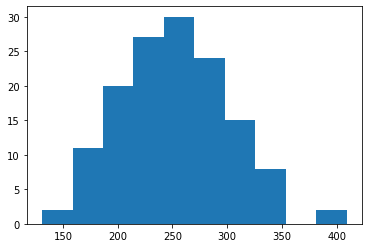

The mean for chol levels in our dataset is: 251.4748201438849


In [30]:
chol_hd = yes_hd.chol
plt.hist(chol_hd)
plt.show()
print('The mean for chol levels in our dataset is: ' + str(chol_hd.mean()))

Do people with heart disease have high cholesterol levels (greater than or equal to 240 mg/dl) on average? We will import the function ttest_1samp from scipy.stats that we'll use to test the following null and alternative hypotheses:

- Null: People with heart disease have an average cholesterol level equal to 240 mg/dl
- Alternative: People with heart disease have an average cholesterol level that is greater than 240 mg/dl



In [23]:
t_stat, p = stats.ttest_1samp(chol_hd, 240, alternative= 'greater')
print(p)    

0.0035411033905155707


ttest_1samp has two inputs: the sample of values (in this case, the cholesterol levels for patients with heart disease) and the null  value (in this case, 240). It has two outputs, the t-statstic and a p-value.

We set the alternative paramter to 'greater' in order to run a 1-side test and we got a p-value of 0,0035 .
This is less than 0.05(standard significance threshold), suggesting that heart disease patients have an average cholesterol level significantly higher than 240 mg/dl.

Let's do the same test for patients who were not diagnosed with heart disease


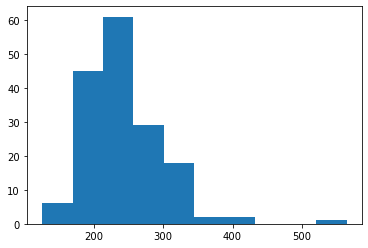

The mean for chol levels in our dataset is: 242.640243902439
0.26397120232220506


In [33]:
chol_nhd = no_hd.chol
plt.hist(chol_nhd)
plt.show()
print('The mean for chol levels in our dataset is: ' + str(chol_nhd.mean()))
t_stat, p = stats.ttest_1samp(chol_nhd, 240, alternative= 'greater')
print(p) 

### Fasting Blood Sugar Analysis

How many patients are there in this dataset? 

The fbs column of this dataset indicates whether or not a patient’s fasting blood sugar was greater than 120 mg/dl (1 means that their fasting blood sugar was greater than 120 mg/dl; 0 means it was less than or equal to 120 mg/dl).

We will calculate the number of patients with fasting blood sugar greater than 12 and save this number as num_highfbs_patients and print it out.

In [37]:
print(len(heart))
num_highfbs_patients= heart[heart.fbs == 1]
num_lowfbs_patients= heart[heart.fbs == 0]

print(len(num_highfbs_patients))
print(len(num_lowfbs_patients))

303
45
258


Sometimes, part of an analysis will involve comparing a sample to known population values to see if the sample appears to be representative of the general population.

By some estimates, about 8% of the U.S. population had diabetes (diagnosed or undiagnosed) in 1988 when this data was collected. 
While there are multiple tests that contribute to a diabetes diagnosis, fasting blood sugar levels greater than 120 mg/dl can be indicative of diabetes (or at least, pre-diabetes). If this sample were representative of the population, approximately how many people would you expect to have diabetes?

In [38]:
estimated_diab = len(heart) * 0.08
print(estimated_diab)



24.240000000000002


Does this sample come from a population in which the rate of fbs > 120 mg/dl is equal to 8%? Import the function from scipy.stats that you can use to test the following null and alternative hypotheses:

- Null: This sample was drawn from a population where 8% of people have fasting blood sugar > 120 mg/dl
- Alternative: This sample was drawn from a population where more than 8% of people have fasting blood sugar > 120 mg/dl

In [41]:
p = stats.binom_test(45, n=303, p=0.08, alternative= 'greater')
print(p)

4.689471951448875e-05


The binom_test() function takes four parameters (in order):

1. The observed number of “successes” (in this case, the number of people in the sample who had fasting blood sugar greater than 120 mg/dl)

2. The number of “trials” (in this case, the number of patients)

3. The null probability of “success” (in this case, 0.08)

3. The alternative parameter, which indicates the alternative hypothesis for the test (eg.,'two-sided' 'greater' or 'less')

The output is the p-value.

If you run the test correctly, you should get a p-value of 4.689471951449078e-05 which is equivalent to 0.0000469 (the e-5 at the end indicates scientific notation). This is less than 0.05, indicating that this sample likely comes from a population where more than 8% of people have fbs > 120 mg/dl.